# Statistics with Python

#### By
> Chinmay Gaikwad

## 1. Types of Statistics

There are two types of statistical analysis
- **Descriptive (Summary Statistics):**
<div>Descriptive statistics focuses on describing and summarizing the data at hand.</div>
- **Inferential:**
<div>Inferential statistics uses the data at hand, which is called sample data, to make inferences about a larger population</div>

## 2. Types of Data

There are two types of Data 
- **Numeric (Quantitative Data)**
 -  **Continuous**
<div> Ex. Weather data </div>
 -  **Discrete**
<div>Ex. Marks of students</div>
- **Categorical (Qualitative Data**)
 -  **Ordered (Ordinal)** 
<div>Ex. Education tier, Ticket IDs</div>
 -  ***Unordered (Nominal)*** 
<div> Ex. Vehicle types</div>

## 3. Measure of Center (Central tendancy)

There are 3 ways to measure the central tendancy
- `Mean`
> The mean, often called the average, is one of the most common ways of summarizing data. To calculate mean, we add up all the numbers of interest and divide by the total number of data points. Mean is a good measure of center for numeric data however it is highly affected due to addition of outliers
- `Median`
> The median is the value where 50% of the data is lower than it, and 50% of the data is higher. We can calculate this by sorting all the data points and taking the middle one. Median is not affected due to addition of outliers.
- `Mode`
> The mode is the most frequent value in the data. Mode is a good measure of center when data is ordered categorical.

Important Term: `Outlier`
> An outier is an obeservation that is unexpectedly out of normal obeservations. Ex. Age of 131 years

Skewness: 

A highly skewed data does not form a normal distribution, it can be either positively skewed or negatively skewed.

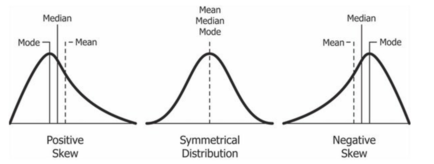




NumPy and SciPy are great python libraries to work with statistial computations

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
data = [2, 8, 12, 29, 42, 42, 49, 68, 77, 79, 87, 98]

#Use np.mean and np.median to calculate the mean and median of the data respectively
mean = np.mean(data)
median = np.median(data)
print("The mean of the data is {} where the median is {}".format(round(mean,4),median))

The mean of the data is 49.4167 where the median is 45.5


In [76]:
from scipy import stats as sts 

mode = sts.mode(data)
print("The mode of the data is {} with frequency".format(mode[0][0]),mode[1][0])

The mode of the data is 42 with frequency 2


## 4. Measure of Spread

1. `Variance`:

It describes how spread apart or close together the data points are. 
To calculate the variance, we start by calculating the distance between each point and the mean, so we get one number for every data point. We then square each distance. The higher the variance, the more spread out the data is. It's important to note that the units of variance are squared
2. `Standard Deviation`:

The standard deviation is another measure of spread, calculated by taking the square root of the variance. 
3. `Mean Absolute Deviation`:

Mean absolute deviation takes the absolute value of the distances to the mean, and then takes the mean of those differences.
4. `Quantiles`:

Quantiles, also called percentiles, split up the data into some number of equal parts. Quartiles, Quintiles, and Deciles, which split up a dataset into 4, 5, and 10 pieces, respectively
5. `Interquartile range (IQR)`

The interquartile range, or IQR, is another measure of spread. It's the distance between the 25th and 75th percentile, which is also the height of the box in a boxplot. 

In [77]:
#To get Quantile values
Quantile = np.quantile(data, [0, 0.25, 0.5, 0.75, 1])
#To get the Variance of the data
Variance = np.var(data)
#To get the Standard Deviation of the data
Std_deviation = np.std(data)
print("The Quantile values are {}, the variance is {} and the standard deviation is {}".format(Quantile,Variance,Std_deviation))

The Quantile values are [ 2.   24.75 45.5  77.5  98.  ], the variance is 970.4097222222222 and the standard deviation is 31.151400004208835


## 5. Probablity Distributions

##5.1. `Binomial Distribution`:

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment, and a sequence of outcomes is called a Bernoulli process; for a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution.

In [78]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(0,n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1
    return n_success

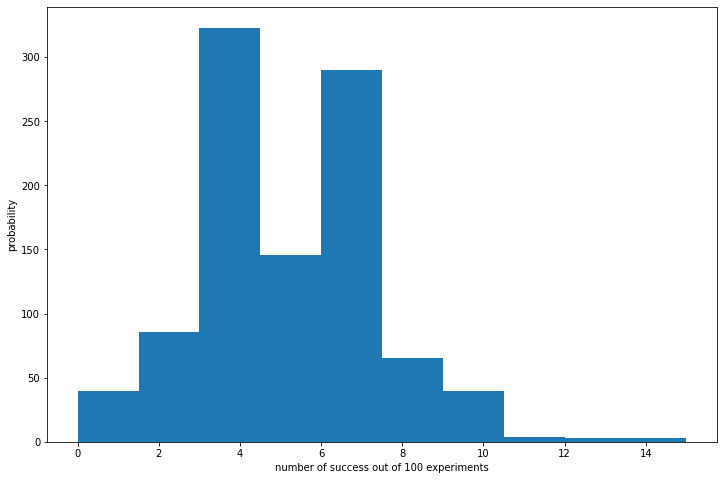

In [79]:
# Seed random number generator
np.random.seed(42)
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)
# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)
    
plt.figure(figsize=(12,8))
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of success out of 100 experiments')
_ = plt.ylabel('probability')
plt.show()

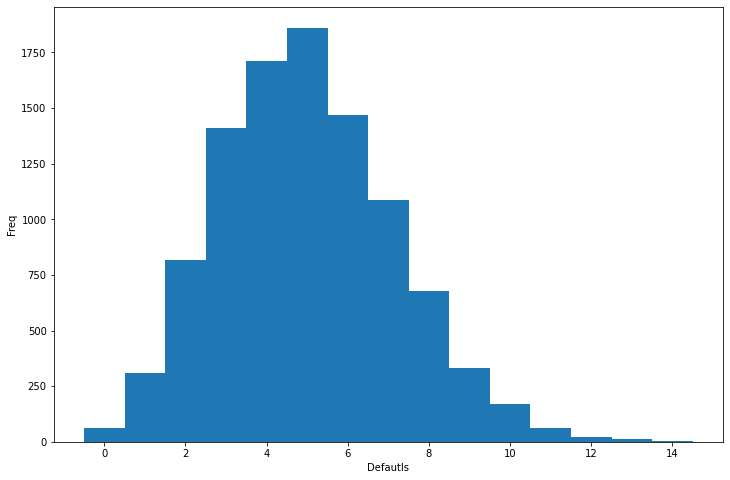

In [80]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(p=0.05,n=100, size=10000)
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.figure(figsize=(12,8))
# Generate histogram
_ = plt.hist(n_defaults, bins=bins)
_ = plt.xlabel('Defautls')
_ = plt.ylabel('Freq')
# Show the plot
plt.show()

## 5.2 `Poisson Distribution`

a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way.
Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

Poisson Distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events.

## 5.3 `Normal Distribution`:



Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

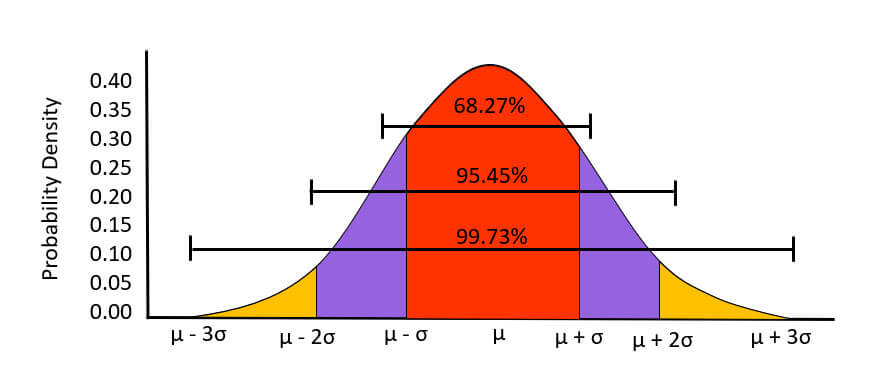

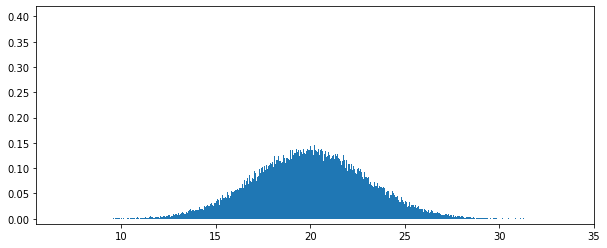

In [81]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std3
plt.rcParams['figure.figsize'] = 10, 4
samples_std3 = np.random.normal(20,3,size=100000)
# Make histograms
_ = plt.hist(samples_std3, bins=1000, density=True )
# Make a legend, set limits and show plot
plt.ylim(-0.01, 0.42)
plt.show()

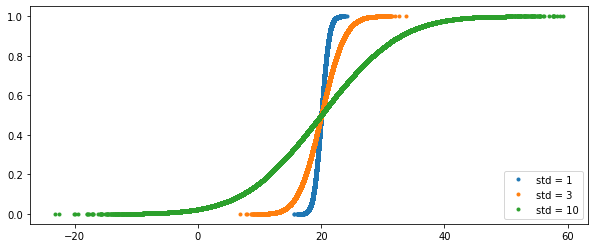

In [82]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# Generate CDFs
samples_std1 = np.random.normal(20,1,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()



## 5.4 `Exponential Distribution`: 

the exponential distribution is the probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.


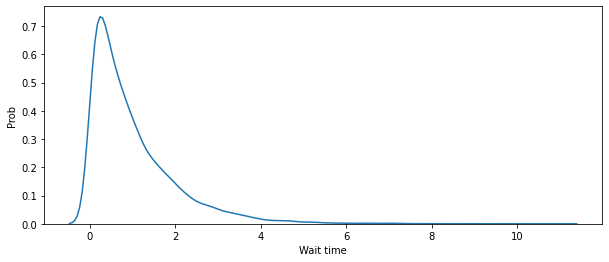

In [83]:
# Draw samples 
# Make the histogram
_ = sns.distplot(np.random.exponential(size=10000), hist=False)
_ = plt.xlabel('Wait time')
_ = plt.ylabel('Prob')
# Show the plot
plt.show()